# UCCB3224 Data Mining Techniques

### Group 11
Group Members:
- Chia Kee Ling, 18065706 (P3)
- Choo Yong Quan, 1803979 (P3)
- Chow Shin Jie, 1804372 (P3)
- Choy Weng Nam, 1605334 (P1)
- Ong Zi Yan, 1804375 (P3)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Collection

In [2]:
df = pd.read_csv('dataset.csv',na_values='?')

## Data Exploration

In [3]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [5]:
df.shape

(90, 18)

In [6]:
df.isnull()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

## Numerical Feature Analysis

In [8]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [9]:
df.corr()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.055256,-0.054194,0.401923
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.016181,-0.014655,0.199992
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.085228,-0.084547,0.149787
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,-0.143677,0.144427,0.642540
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.042160,0.042669,0.207582
Legs,0.373619,0.192318,0.157727,0.902302,0.155552,1.000000,0.368994,0.375496,-0.057701,0.058161,0.673825
Block,0.932411,0.518165,0.519603,0.438023,0.548036,0.368994,1.000000,0.743340,-0.030037,0.031621,0.416015
ReusedCount,0.735193,0.612327,0.684802,0.410324,0.594109,0.375496,0.743340,1.000000,-0.101877,0.102668,0.466584
Longitude,0.055256,0.016181,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,-0.101877,1.000000,-0.999966,-0.089519
Latitude,-0.054194,-0.014655,-0.084547,0.144427,0.042669,0.058161,0.031621,0.102668,-0.999966,1.000000,0.090782


In [10]:
#To show the exact data of each numerical feature
num = df[['FlightNumber','PayloadMass','Flights','Block','ReusedCount','Longitude','Latitude']]
num

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
0,1,6104.959412,1,1.0,0,-80.577366,28.561857
1,2,525.000000,1,1.0,0,-80.577366,28.561857
2,3,677.000000,1,1.0,0,-80.577366,28.561857
3,4,500.000000,1,1.0,0,-120.610829,34.632093
4,5,3170.000000,1,1.0,0,-80.577366,28.561857
...,...,...,...,...,...,...,...
85,86,15400.000000,2,5.0,2,-80.603956,28.608058
86,87,15400.000000,3,5.0,2,-80.603956,28.608058
87,88,15400.000000,6,5.0,5,-80.603956,28.608058
88,89,15400.000000,3,5.0,2,-80.577366,28.561857


Text(0.5, 1.0, 'Correlation matrix & Heatmap')

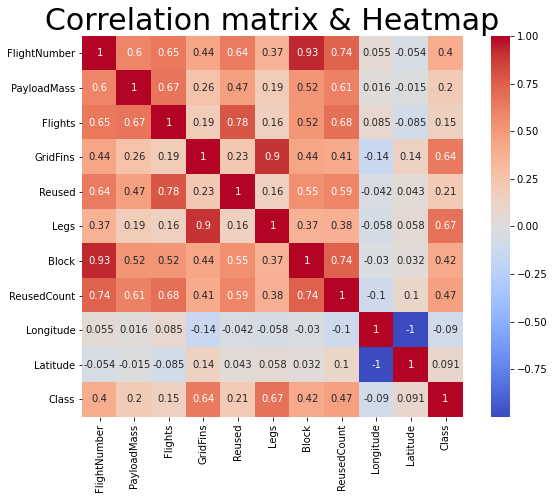

In [11]:
# Use correlation matrix and heatmap to represent the quantifiable relationship among the features
plt.figure(figsize =(10,7))
corrmat = df.corr()
sns.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="coolwarm");
plt.title('Correlation matrix & Heatmap',fontsize = 30)

From the heatmap above, we can identify that GridFins and Legs has very high correlation as their combination gives a positive correlation of 0.9.

In [12]:
#plt.figure(figsize =(15,15))
#sns.pairplot(df, hue='Class')
#plt.show()
# later remember to uncomment back

The image above shown multiple pairwise bivariate distributions of the data that shows the relationship for each pair of columns.

## Categorical Feature Analysis

In [13]:
cat = df[['Date','BoosterVersion','Orbit','LaunchSite','Outcome','GridFins','Reused','Legs','LandingPad','Serial','Class']]
cat

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
0,2010-06-04,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003,0
1,2012-05-22,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005,0
2,2013-03-01,Falcon 9,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007,0
3,2013-09-29,Falcon 9,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003,0
4,2013-12-03,Falcon 9,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004,0
...,...,...,...,...,...,...,...,...,...,...,...
85,2020-09-03,Falcon 9,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1060,1
86,2020-10-06,Falcon 9,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1058,1
87,2020-10-18,Falcon 9,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051,1
88,2020-10-24,Falcon 9,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc,B1060,1


In [14]:
cat.isnull().sum()

Date               0
BoosterVersion     0
Orbit              0
LaunchSite         0
Outcome            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Serial             0
Class              0
dtype: int64

Since LandingPad contains 26 null values, dropping it may reduce the size of the dataset. Thus, we decide to replace those null values with 'None' which indicates not applicable in the Data Preparation stage.

In [15]:
cat.value_counts()

Date        BoosterVersion  Orbit  LaunchSite    Outcome     GridFins  Reused  Legs  LandingPad                Serial  Class
2015-01-10  Falcon 9        ISS    CCAFS SLC 40  False ASDS  True      False   True  5e9e3032383ecb761634e7cb  B1012   0        1
2015-04-14  Falcon 9        ISS    CCAFS SLC 40  False ASDS  True      False   True  5e9e3032383ecb761634e7cb  B1015   0        1
2018-11-15  Falcon 9        GTO    KSC LC 39A    True ASDS   True      True    True  5e9e3032383ecb6bb234e7ca  B1047   1        1
2018-12-03  Falcon 9        SSO    VAFB SLC 4E   True ASDS   True      True    True  5e9e3033383ecbb9e534e7cc  B1046   1        1
2018-12-05  Falcon 9        ISS    CCAFS SLC 40  False RTLS  True      False   True  5e9e3032383ecb267a34e7c7  B1050   0        1
                                                                                                                               ..
2018-01-08  Falcon 9        LEO    CCAFS SLC 40  True RTLS   True      False   True  5e9e303238

In [16]:
cat.nunique()

Date              90
BoosterVersion     1
Orbit             11
LaunchSite         3
Outcome            8
GridFins           2
Reused             2
Legs               2
LandingPad         5
Serial            53
Class              2
dtype: int64

In [17]:
for column in cat:
    print('%s\n%s\n' % (column, cat[column].value_counts()))

Date
2020-10-06    1
2016-05-27    1
2018-04-18    1
2015-01-10    1
2015-12-22    1
             ..
2018-01-31    1
2020-10-18    1
2017-05-15    1
2018-12-23    1
2018-11-15    1
Name: Date, Length: 90, dtype: int64

BoosterVersion
Falcon 9    90
Name: BoosterVersion, dtype: int64

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
SO        1
HEO       1
ES-L1     1
GEO       1
Name: Orbit, dtype: int64

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

GridFins
True     70
False    20
Name: GridFins, dtype: int64

Reused
False    53
True     37
Name: Reused, dtype: int64

Legs
True     71
False    19
Name: Legs, dtype: int64

LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e53

From here we can noticed that the BoosterVersion has only 1 unique value which is 'Falcon 9'. Thus, this features might not be useful in the classification task later. 

<AxesSubplot:xlabel='Serial'>

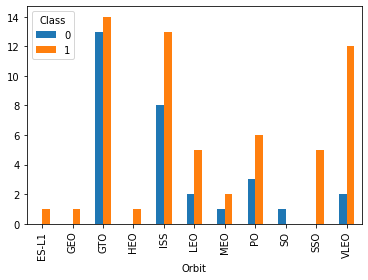

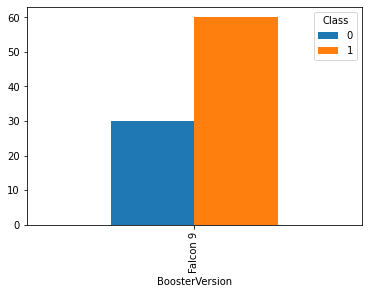

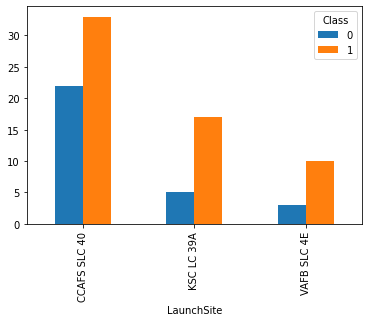

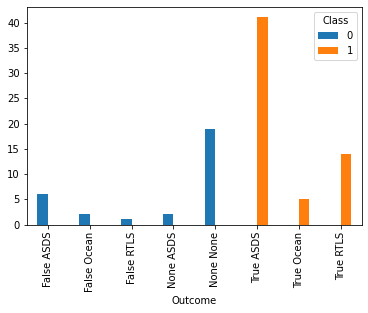

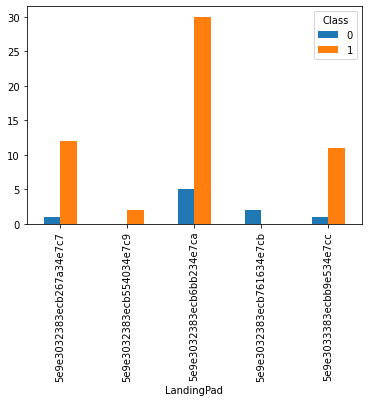

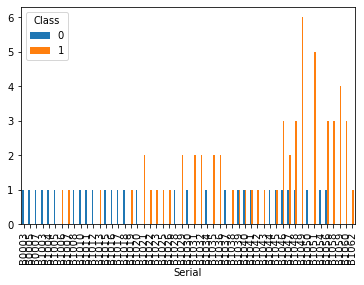

In [18]:
df.groupby(['Orbit','Class']).size().unstack().plot(kind='bar')
df.groupby(['BoosterVersion','Class']).size().unstack().plot(kind='bar')
df.groupby(['LaunchSite','Class']).size().unstack().plot(kind='bar')
df.groupby(['Outcome','Class']).size().unstack().plot(kind='bar')
df.groupby(['LandingPad','Class']).size().unstack().plot(kind='bar')
df.groupby(['Serial','Class']).size().unstack().plot(kind='bar')

Since Date consists of very large number of unique value counts, we consider to plot its relation with the class by performing manual grouping (separated by years or months):

<AxesSubplot:xlabel='Date'>

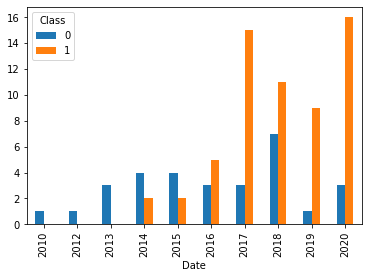

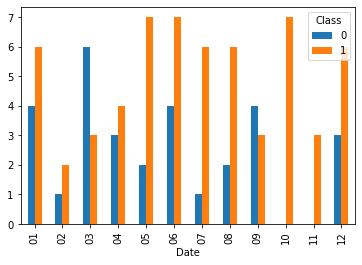

In [19]:
year = []
month = []
for i in df["Date"]:
    year.append(i.split("-")[0])
    month.append(i.split("-")[1])

df1 = df.copy()
df1["Date"] = year
df1.groupby(['Date','Class']).size().unstack().plot(kind='bar')

df2 = df.copy()
df2["Date"] = month
df2.groupby(['Date','Class']).size().unstack().plot(kind='bar')

From the graphs above, we can say that all these categorical features might be crucial for the analysis and prediction afterwards except BoosterVersion as there is only "Falcon9" that fill up all the row of BoosterVersion, which does not take count as a crucial categorical features.

## EDA on Training Data

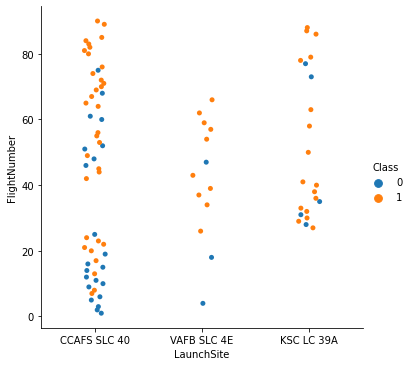

In [20]:
# Visualize the relationship between launch site and flight number to get insight on which launch site result in better 
# landing outcome)
sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df)
plt.show()

Based on the graph above, we can observe that most of the flight are launch at CCAFS SLC 40 while least of the flight are launch at VAFB SLC 4E

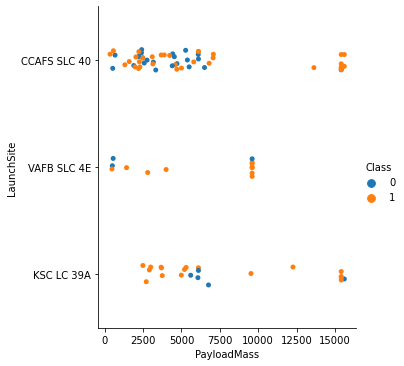

In [21]:
# Visualize the relationship between payload and launch site to get insight on which launch site result in better 
# landing outcome when the rocket carrying different weights
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.show()

The launch site CCAFS SLC 40 and VAFB SLC 4E had a high chances of success when the payload mass was higher. Meanwhile, KSC LC 39A VAFB SLC 4E had high chance of success when it carry light payload.

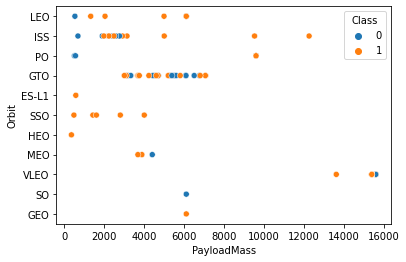

In [22]:
#Visualize the relationship between the orbit and PayloadMass
sns.scatterplot(x=df["PayloadMass"], y=df["Orbit"], data=df, hue="Class")

plt.show()

We could say the heavier the payloads, the greater the success rate of rocket launching for most of the orbit. Meanwhile, LEO orbit gives negative result as payload mass increased. Outcome from GTO orbit seems do not related to payload mass. On the other hand, we cannot say that payload mass will have any impact on choosing the HEO orbit and ES-L1 for lauching yet since they only being adapted once.

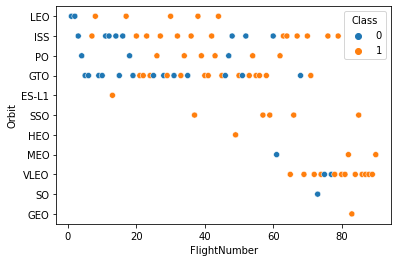

In [23]:
# Visualize the relationship between flight number and orbit type to get insight on as SpaceX launches more rocket which orbit
# will have better launching outcome
sns.scatterplot(x=df["FlightNumber"], y=df["Orbit"], data=df, hue="Class")
plt.show()

As SpaceX keep launching rocket, it can be seen that the LEO orbit and SSO orbit gives positive outcome. It seems to be no relationship between flight number when the launching is using VLEO orbit, ISS orbit, PO orbit and GTO orbit. Meanwhile for GEO orbit, SO orbit, HEO orbit, MEO orbit and ES-L1 orbit they only being used few times so we could not say that they have higher or lower success rate.

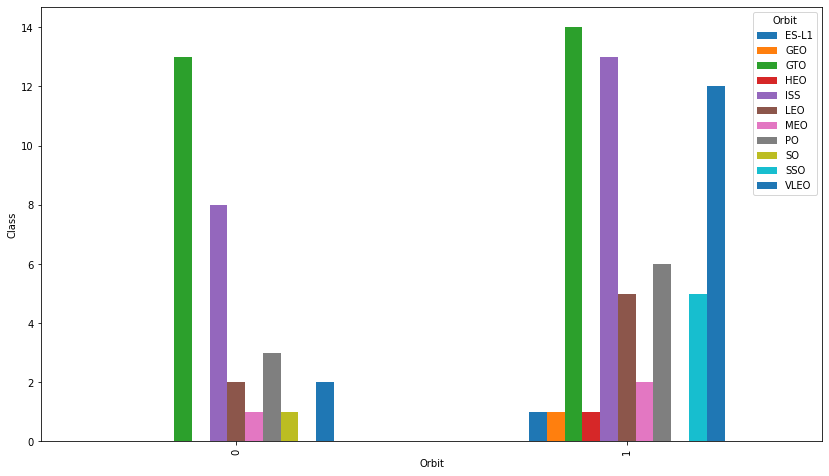

In [24]:
#Visualize the relationship between Orbit (orbit chosen) and Class (outcome of the launching)

#optional methods:
#orbitcount = spacex_train.groupby(['Orbit', 'Class'])['Class'].count()
#orbitcount.plot(kind='bar', figsize=(15, 5), color = "orange")

orbitsr = df.groupby(['Orbit','Class'])['Class'].count().unstack(0).plot.bar(figsize=(14,8))
_ = orbitsr.set_xlabel('Orbit')
_ = orbitsr.set_ylabel('Class')

We could see that VLEO orbit, Po orbit, LEO orbit and ISS orbit have a higher chances of success rate, GTO orbit has higher failure rate, and other orbits only had too few launches so cannot derive a conclusion on their success rate.

# Object Queries

In [25]:
# Display the total payload mass carried out by boosters launched by Nasa
df.groupby(['BoosterVersion']).sum()['PayloadMass']

BoosterVersion
Falcon 9    549446.347059
Name: PayloadMass, dtype: float64

In [26]:
# Find the date when the first landing launched.
min(df['Date'])

'2010-06-04'

In [27]:
# Calculate the total number of success class for each orbit type
df.groupby(['Orbit']).sum()['Class']

Orbit
ES-L1     1
GEO       1
GTO      14
HEO       1
ISS      13
LEO       5
MEO       2
PO        6
SO        0
SSO       5
VLEO     12
Name: Class, dtype: int64

In [28]:
# List the total number of successful outcomes
# np.count_nonzero(df['Class']) # this only shows success
df['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [29]:
# Calculate the total number of successful class for each launch site
df.groupby(['LaunchSite']).sum()['Class']

LaunchSite
CCAFS SLC 40    33
KSC LC 39A      17
VAFB SLC 4E     10
Name: Class, dtype: int64

In [30]:
#Calculate the number of reused component being install on each orbit
df.groupby(['Orbit']).sum()['Reused']

Orbit
ES-L1     0
GEO       1
GTO       9
HEO       0
ISS       5
LEO       0
MEO       0
PO        3
SO        1
SSO       4
VLEO     14
Name: Reused, dtype: int64

In [31]:
#Calculate the number of times a component being reused on each orbit
df.groupby(['Orbit']).sum()['ReusedCount']

Orbit
ES-L1     0
GEO       2
GTO      26
HEO       1
ISS      27
LEO       3
MEO       2
PO       14
SO        3
SSO      16
VLEO     55
Name: ReusedCount, dtype: int64

In [32]:
#Calculate the number of success round trip of rocket for each orbit
df.groupby(['Orbit']).sum()['Class']

Orbit
ES-L1     1
GEO       1
GTO      14
HEO       1
ISS      13
LEO       5
MEO       2
PO        6
SO        0
SSO       5
VLEO     12
Name: Class, dtype: int64

## Data Preparation

In [33]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


## Data Preprocessing - Numerical Features 

In [34]:
num.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
0,1,6104.959412,1,1.0,0,-80.577366,28.561857
1,2,525.000000,1,1.0,0,-80.577366,28.561857
2,3,677.000000,1,1.0,0,-80.577366,28.561857
3,4,500.000000,1,1.0,0,-120.610829,34.632093
4,5,3170.000000,1,1.0,0,-80.577366,28.561857


In [35]:
# FlightNumber feature is an index column that will auto increment everytime a launching is being triggered,
# Longitude and Latitude are simply the LaunchSite's location which are not useful for future works
# Hence these 3 features are dropped from numerical data list
num.drop(["FlightNumber","Longitude","Latitude"], axis = 1, inplace = True)
num.head(5)

,PayloadMass,Flights,Block,ReusedCount
0,6104.959412,1,1.0,0
1,525.000000,1,1.0,0
2,677.000000,1,1.0,0
3,500.000000,1,1.0,0
4,3170.000000,1,1.0,0


In [36]:
#Check missing value in numerical data
num.isnull().sum()

PayloadMass    0
Flights        0
Block          0
ReusedCount    0
dtype: int64

<AxesSubplot:>

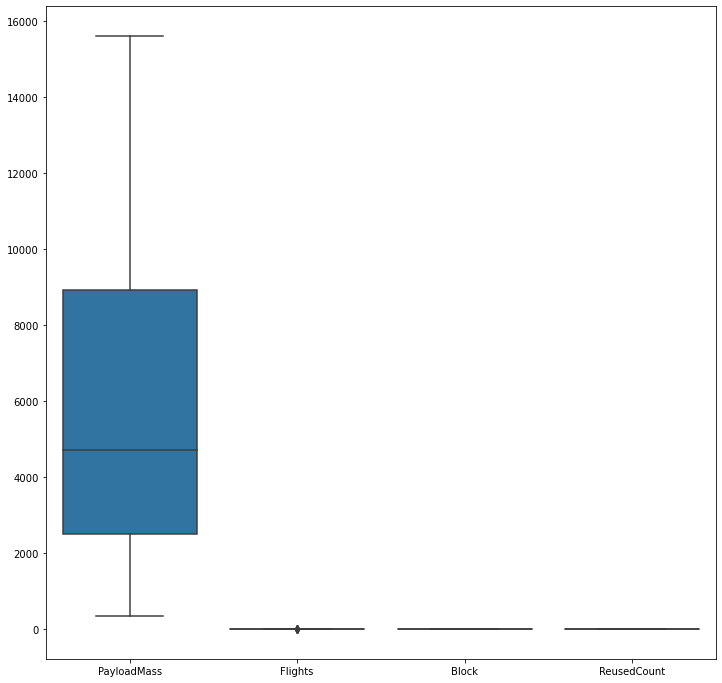

In [37]:
# Check outliers
#num.boxplot(figsize=(15,15))
plt.figure(figsize =(12,12))
sns.boxplot(data=num)

Based on the boxplot above, there are some outliers in Flights feature.

In [38]:
Z = (num-num.mean())/num.std()
Z.describe()

,PayloadMass,Flights,Block,ReusedCount
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,-2.652199e-16,-6.784696e-16,1.208910e-16,4.280527e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.225849e+00,-6.502698e-01,-1.567115e+00,-9.680173e-01
25%,-7.655933e-01,-6.502698e-01,-9.402691e-01,-9.680173e-01
50%,-2.989473e-01,-6.502698e-01,3.134230e-01,-3.833089e-01
75%,5.980803e-01,1.740159e-01,9.402691e-01,7.861080e-01
max,2.022514e+00,3.471159e+00,9.402691e-01,1.955525e+00


In [39]:
z_scores = stats.zscore(num)
abs_z_scores = np.abs(z_scores)
filtered_ent = (abs_z_scores <= 3).all(axis=1)
# select the z score <= than 3 and > -3

num = num[filtered_ent]
num_f = num[['PayloadMass','Flights','Block','ReusedCount']]
print('Row no. after discarding outliers = %d' % num_f.shape[0])

Row no. after discarding outliers = 88


In [40]:
# We use IQR instead of z-score to do detect outlier(s)
#sorted(num)
#Q1=num.quantile(0.25)
#Q3=num.quantile(0.75)
#IQR=Q3-Q1
#print(IQR)

# Give an output with some true and false values 
# False = valid and True = outlier(s)
#print([num < (Q1 - 1.5 * IQR) | (num > (Q3 + 1.5 * IQR))])

# Remove the outlier from the data set
#num_f = num[~((num < (Q1 - 1.5 * IQR)) |(num > (Q3 + 1.5 * IQR))).any(axis=1)]
#num_f.shape

In [41]:
# To ensure there are no duplicate data
dup = num_f.duplicated()
print((dup.sum()))

3


In [42]:
# Drop duplicate(s)
num_fin = num_f.drop_duplicates()
num_fin.shape

(85, 4)

In [43]:
# Standardization
# Make the mean of the dataset as 0 and the standard deviation equivalent to 1
# To ensure data to have same scale in terms of Feature to avoid bias in the outcome

for x in num_fin.columns:    
    # fitting column
    scale = StandardScaler().fit(num_fin[[x]])
    # transforming column
    num_fin[x] = scale.transform(num_fin[[x]])
print('Mean:\n',num_fin.mean (axis=0))
print('\nStd Deviation:\n',num_fin.std (axis=0))

Mean:
 PayloadMass    7.836868e-17
Flights        1.345329e-16
Block         -9.665471e-17
ReusedCount   -4.480076e-16
dtype: float64

Std Deviation:
 PayloadMass    1.005935
Flights        1.005935
Block          1.005935
ReusedCount    1.005935
dtype: float64


In [44]:
# Data splitting into training set and testing set 
num_train, num_test = train_test_split(num_fin, test_size=0.2, random_state=2)
print("Original data shape: {}".format(num_fin.shape))
print("Splitted training data shape: {}".format(num_train.shape))
print("Splitted testing data shape: {}".format(num_test.shape))

Original data shape: (85, 4)
Splitted training data shape: (68, 4)
Splitted testing data shape: (17, 4)


## Data Preprocessing - Categorical Features

In [45]:
cat.head()

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
0,2010-06-04,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003,0
1,2012-05-22,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005,0
2,2013-03-01,Falcon 9,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007,0
3,2013-09-29,Falcon 9,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003,0
4,2013-12-03,Falcon 9,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004,0


In [46]:
#Since Class counted as Categorical Feature here we change it to boolean
cat["Class"] = cat["Class"].astype("bool")
cat.head()

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
0,2010-06-04,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003,False
1,2012-05-22,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005,False
2,2013-03-01,Falcon 9,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007,False
3,2013-09-29,Falcon 9,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003,False
4,2013-12-03,Falcon 9,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004,False


In [47]:
#Since BoosterVersion is the same along all the rows, we drop it because it is not useful and would not affect our future works
cat.drop("BoosterVersion", axis = 1, inplace = True)
cat.head(5)

,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
0,2010-06-04,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003,False
1,2012-05-22,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005,False
2,2013-03-01,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007,False
3,2013-09-29,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003,False
4,2013-12-03,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004,False


In [48]:
# Data splitting into training set and testing set 
cat_train, cat_test = train_test_split(cat, test_size=0.2, random_state=2)
print("Original data shape: {}".format(cat.shape))
print("Splitted training data shape: {}".format(cat_train.shape))
print("Splitted testing data shape: {}".format(cat_test.shape))

Original data shape: (90, 10)
Splitted training data shape: (72, 10)
Splitted testing data shape: (18, 10)


In [49]:
#Find missing values
cat_train.isnull().sum()

Date           0
Orbit          0
LaunchSite     0
Outcome        0
GridFins       0
Reused         0
Legs           0
LandingPad    23
Serial         0
Class          0
dtype: int64

In [50]:
#Fill the missing value
cat_train['LandingPad'].fillna(value="None", inplace=True)
cat_train.head()

,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
30,2017-05-15,GTO,KSC LC 39A,None None,False,False,False,None,B1034,False
27,2017-03-16,GTO,KSC LC 39A,None None,False,False,False,None,B1030,False
44,2018-01-31,GTO,CCAFS SLC 40,True Ocean,True,True,True,None,B1032,True
35,2017-08-14,ISS,KSC LC 39A,True RTLS,True,False,True,5e9e3032383ecb267a34e7c7,B1039,True
57,2018-11-15,GTO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1047,True


In [51]:
# Outlier not applicable for catgorical data
# Find duplicate data
cat_train.duplicated().sum()

0

In [52]:
# To explore how many categories exist in those crucuial categorical features
orbit = pd.get_dummies(cat_train["Orbit"]).shape
launch_site = pd.get_dummies(cat_train["LaunchSite"]).shape
landing_pad = pd.get_dummies(cat_train["LandingPad"]).shape
serial = pd.get_dummies(cat_train["Serial"]).shape

print("Orbit cat num: %s"%(orbit[1]))
print("LaunchSite cat num: %s"%(launch_site[1]))
print("LandingPad cat num: %s"%(landing_pad[1]))
print("Serial cat num: %s"%(serial[1]))

Orbit cat num: 10
LaunchSite cat num: 3
LandingPad cat num: 5
Serial cat num: 45


There are 45 categories in Serial feature which it might affects the outcome of the prediction as it might cause overfitting issue. In addition, it is just serial number that would not, or do not really play a significant role in affecting the outcome. Hence, it will be dropped afterwards.

To handle the Categorical Data, we use get_dummies and features dataframe to apply OneHotEncoder to Orbits, LaunchSite, LandingPad, and Serial columns:

In [53]:
col = ["Orbit", "LaunchSite", "LandingPad"]
dum = pd.get_dummies(cat_train[col])
cat_train_dum = pd.concat([cat_train.drop(columns = col), dum], axis = 1)
cat_train_dum.head().sort_index()

,Date,Outcome,GridFins,Reused,Legs,Serial,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_None
27,2017-03-16,None None,False,False,False,B1030,False,0,0,1,...,0,0,0,1,0,0,0,0,0,1
30,2017-05-15,None None,False,False,False,B1034,False,0,0,1,...,0,0,0,1,0,0,0,0,0,1
35,2017-08-14,True RTLS,True,False,True,B1039,True,0,0,0,...,0,0,0,1,0,1,0,0,0,0
44,2018-01-31,True Ocean,True,True,True,B1032,True,0,0,1,...,0,0,1,0,0,0,0,0,0,1
57,2018-11-15,True ASDS,True,True,True,B1047,True,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [54]:
print("Cat features before OneHotEncoded: %s"%(cat_train.shape[1]))
print("Cat features after OneHotEncodered: %s"%(cat_train_dum.shape[1]))

Cat features before OneHotEncoded: 10
Cat features after OneHotEncodered: 25


We use chi-squired test to find best categorical feature(s) subset:

In [55]:
col = ["GridFins", "Reused", "Legs", "Class"]
dum_ct = pd.get_dummies(cat_train[col])

chisqt = pd.DataFrame(data=[(0 for i in range(len(dum_ct.columns))) for i in range(len(dum_ct.columns))], 
                         columns=list(dum_ct.columns))
chisqt.set_index(pd.Index(list(dum_ct.columns)), inplace = True)

# Find p_value for all columns and put them in the matrix
for a in list(dum_ct.columns):
    for b in list(dum_ct.columns):
        if a != b:
            chi2_val, p_val = chi2(np.array(dum_ct[a]).reshape(-1, 1), np.array(dum_ct[b]).reshape(-1, 1))
            chisqt.loc[a,b] = p_val
print(chisqt)

          GridFins    Reused      Legs     Class
GridFins  0.000000  0.366023  0.000273  0.007592
Reused    0.160373  0.000000  0.414485  0.204084
Legs      0.000414  0.610214  0.000000  0.006139
Class     0.001514  0.331216  0.000791  0.000000


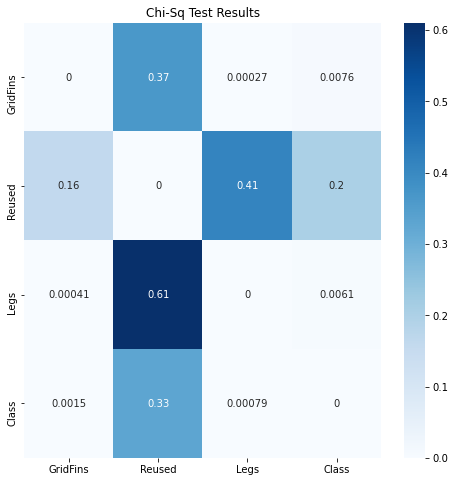

In [56]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(chisqt, annot=True, cmap='Blues')
plt.title('Chi-Sq Test Results')
plt.show()

From the heatmap, we could say that Legs and GridFins have very high correlation as their value is less than 0.5 and near to 0 and this means they have low correlation between the two features where we can kept both of them.
Besides, there is no conclusive evidence that others feature combinations are dependent on each other as their p-values are greater that 0.05. (ignoring the class as it is an output vector)

In [57]:
# Construct data - change date from full format into month presentation
date = cat_train_dum.loc[:, "Date"]
month = date.apply(lambda x:x.split('-')[1])
# month is derived attribute

cat_train_dum["Date"] = month.values
cat_train_dum.rename(columns = {'Date':'Month'}, inplace = True)
cat_train_dum.head().sort_index()

,Month,Outcome,GridFins,Reused,Legs,Serial,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_None
27,03,None None,False,False,False,B1030,False,0,0,1,...,0,0,0,1,0,0,0,0,0,1
30,05,None None,False,False,False,B1034,False,0,0,1,...,0,0,0,1,0,0,0,0,0,1
35,08,True RTLS,True,False,True,B1039,True,0,0,0,...,0,0,0,1,0,1,0,0,0,0
44,01,True Ocean,True,True,True,B1032,True,0,0,1,...,0,0,1,0,0,0,0,0,0,1
57,11,True ASDS,True,True,True,B1047,True,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [58]:
#Remove meaningless feature(s)
cat_train_dum.drop("Outcome", axis = 1, inplace = True)
cat_train_dum.drop("Serial", axis = 1, inplace = True)
cat_train_fin = cat_train_dum
cat_train_fin.head()

,Month,GridFins,Reused,Legs,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_ISS,Orbit_LEO,...,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_None
30,05,False,False,False,False,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
27,03,False,False,False,False,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
44,01,True,True,True,True,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
35,08,True,False,True,True,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
57,11,True,True,True,True,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [59]:
#feature scaling N/A on categorical data

In [60]:
################################ Data Preprocessing on Testing Set of Cat Features ################################
################################                                                   ################################
## basically we redo the same things
cat_test.isnull().sum()

Date          0
Orbit         0
LaunchSite    0
Outcome       0
GridFins      0
Reused        0
Legs          0
LandingPad    3
Serial        0
Class         0
dtype: int64

In [61]:
# Fill NaN value in landing pad with the value appear most in that column
cat_test_fi = cat_test.fillna(cat_train.mode().iloc[0,7])
cat_test_fi.head(5).sort_index()

,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
36,2017-08-24,SSO,VAFB SLC 4E,True ASDS,True,False,True,5e9e3033383ecbb9e534e7cc,B1038,True
48,2018-04-18,HEO,CCAFS SLC 40,True ASDS,True,False,True,5e9e3032383ecb6bb234e7ca,B1045,True
77,2020-04-22,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051,True
79,2020-06-04,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc,B1049,True
81,2020-06-30,MEO,CCAFS SLC 40,True ASDS,True,False,True,5e9e3033383ecbb9e534e7cc,B1060,True


In [62]:
cat_test_fi.duplicated().sum()

0

In [63]:
# To explore how many categories exist in those crucuial categorical features
orbit = pd.get_dummies(cat_test_fi["Orbit"]).shape
launch_site = pd.get_dummies(cat_test_fi["LaunchSite"]).shape
landing_pad = pd.get_dummies(cat_test_fi["LandingPad"]).shape
serial = pd.get_dummies(cat_test_fi["Serial"]).shape

print("Orbit cat num: %s"%(orbit[1]))
print("LaunchSite cat num: %s"%(launch_site[1]))
print("LandingPad cat num: %s"%(landing_pad[1]))
print("Serial cat num: %s"%(serial[1]))

Orbit cat num: 8
LaunchSite cat num: 3
LandingPad cat num: 4
Serial cat num: 16


In [64]:
col = ["Orbit", "LaunchSite", "LandingPad"]
dum = pd.get_dummies(cat_test_fi[col])
cat_test_dum = pd.concat([cat_test_fi.drop(columns = col), dum], axis = 1)
cat_test_dum.head().sort_index()

print("Number of categorical features after applied OneHotEncoder: %s"%(cat_test_dum.shape[1]))

Number of categorical features after applied OneHotEncoder: 22


In [65]:
cat_train_fin.head()

,Month,GridFins,Reused,Legs,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_ISS,Orbit_LEO,...,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_None
30,05,False,False,False,False,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
27,03,False,False,False,False,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
44,01,True,True,True,True,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
35,08,True,False,True,True,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
57,11,True,True,True,True,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [66]:
cat_test_dum.head()

,Date,Outcome,GridFins,Reused,Legs,Serial,Class,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Orbit_PO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
48,2018-04-18,True ASDS,True,False,True,B1045,True,0,1,0,...,0,0,0,1,0,0,0,1,0,0
77,2020-04-22,True ASDS,True,True,True,B1051,True,0,0,0,...,0,0,1,0,1,0,0,1,0,0
81,2020-06-30,True ASDS,True,False,True,B1060,True,0,0,0,...,0,0,0,1,0,0,0,0,0,1
79,2020-06-04,True ASDS,True,True,True,B1049,True,0,0,0,...,0,0,1,1,0,0,0,0,0,1
36,2017-08-24,True ASDS,True,False,True,B1038,True,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [67]:
# Drop the features those exist in the testing dataset but not in the training data set
#cat_test_dum.drop("Orbit_HEO", axis = 1, inplace = True)
#cat_test_dum.drop("LandingPad_5e9e3032383ecb761634e7cb", axis = 1, inplace = True)

In [68]:
# Add features exist in the training dataset but not in testing dataset, replace missing values with 0
#cat_test_dum.append(cat_train_fin["Orbit_ES-L1"])
#cat_test_dum.append(cat_train_fin["Orbit_GEO"])
#cat_test_dum.append(cat_train_fin["Orbit_SO"])
#cat_test_dum.append(cat_train_fin["LandingPad_5e9e3032383ecb554034e7c9"])
#cat_test_dum.append(cat_train_fin["LandingPad_5e9e3032383ecb6bb234e7ca"])
#cat_test_dum.append(cat_train_fin["LandingPad_None"])
#cat_test_dum.shape

In [69]:
# Drop the features those exist in the testing dataset but not in the training data set

train_col = cat_train_dum.iloc[:, 5:].columns
test_col = cat_test_dum.iloc[:, 7:].columns

drop_col = []
for i in test_col:
    if not (i in train_col):
        drop_col.append(i)
cat_test_dum.drop(columns = drop_col, axis = 1, inplace = True)
cat_test_dum.iloc[:, 7:].shape

(18, 13)

In [70]:
# Add features exist in the training dataset but not in testing dataset, replace missing values with 0

train_column = cat_train_fin.iloc[:, 5:].columns
test_column = cat_test_dum.iloc[:, 7:].columns

add_column = []
for i in train_column:
    if not (i in test_column):
        add_column.append(i)
for j in add_column:
    cat_test_dum["%s"%j] = 0
cat_test_dum.iloc[:, 7:].shape

(18, 18)

In [71]:
cat_train_fin.head()

,Month,GridFins,Reused,Legs,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_ISS,Orbit_LEO,...,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_None
30,05,False,False,False,False,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
27,03,False,False,False,False,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
44,01,True,True,True,True,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
35,08,True,False,True,True,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
57,11,True,True,True,True,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [72]:
cat_test_dum.head()

,Date,Outcome,GridFins,Reused,Legs,Serial,Class,Orbit_GTO,Orbit_ISS,Orbit_LEO,...,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc,Orbit_ES-L1,Orbit_GEO,Orbit_SO,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_None
48,2018-04-18,True ASDS,True,False,True,B1045,True,0,0,0,...,0,0,0,1,0,0,0,0,0,0
77,2020-04-22,True ASDS,True,True,True,B1051,True,0,0,0,...,1,0,0,1,0,0,0,0,0,0
81,2020-06-30,True ASDS,True,False,True,B1060,True,0,0,0,...,0,0,0,0,1,0,0,0,0,0
79,2020-06-04,True ASDS,True,True,True,B1049,True,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36,2017-08-24,True ASDS,True,False,True,B1038,True,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [73]:
# Feature selection & change date into month presentation - drop Date and add Month (extracted feature)
date = cat_test_dum.loc[:, "Date"]
month = date.apply(lambda x:x.split('-')[1])

cat_test_dum["Date"] = month.values
cat_test_dum.rename(columns = {'Date':'Month'}, inplace = True)
cat_test_dum.head().sort_index()

,Month,Outcome,GridFins,Reused,Legs,Serial,Class,Orbit_GTO,Orbit_ISS,Orbit_LEO,...,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc,Orbit_ES-L1,Orbit_GEO,Orbit_SO,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_None
36,08,True ASDS,True,False,True,B1038,True,0,0,0,...,0,1,0,0,1,0,0,0,0,0
48,04,True ASDS,True,False,True,B1045,True,0,0,0,...,0,0,0,1,0,0,0,0,0,0
77,04,True ASDS,True,True,True,B1051,True,0,0,0,...,1,0,0,1,0,0,0,0,0,0
79,06,True ASDS,True,True,True,B1049,True,0,0,0,...,0,0,0,0,1,0,0,0,0,0
81,06,True ASDS,True,False,True,B1060,True,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
# Drop features not found in training dataset - Outcome, Serial
cat_test_dum.drop("Outcome", axis = 1, inplace = True)
cat_test_dum.drop("Serial", axis = 1, inplace = True)
cat_test_fin = cat_test_dum
cat_test_fin.head(5).sort_index()

,Month,GridFins,Reused,Legs,Class,Orbit_GTO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,...,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc,Orbit_ES-L1,Orbit_GEO,Orbit_SO,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_None
36,08,True,False,True,True,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
48,04,True,False,True,True,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
77,04,True,True,True,True,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
79,06,True,True,True,True,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
81,06,True,False,True,True,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
# Finalizing all data before combination
print("Train set shape: {}".format(cat_train_fin.shape))
print("Test set shape: {}".format(cat_test_fin.shape))

Train set shape: (72, 23)
Test set shape: (18, 23)


In [76]:
#Combine both numerical and categorical features
train_ulti = pd.merge(num_train, cat_train_fin, left_index=True, right_index=True)
test_ulti = pd.merge(num_test, cat_test_fin, left_index=True, right_index=True)

train_ulti = train_ulti.reset_index().drop(['index'], axis = 1)
test_ulti = test_ulti.reset_index().drop(['index'], axis = 1)

In [77]:
# remove the Output Vector - Class column
x_train = train_ulti.drop(['Class'], axis = 1)
y_train = train_ulti['Class']

x_test = test_ulti.drop(['Class'], axis = 1)
y_test = test_ulti['Class']

In [78]:
#Summary of Preprocessed Data
print('Ori Data:', df.shape)
print('\nPreprocessed, Combined Training Set: ')
print('x train: ',x_train.shape)
print('y train: ',y_train.shape)

print('\nPreprocessed, Combined Testing Set: ')
print('x test:  ',x_test.shape)
print('y test:  ',y_test.shape)

Ori Data: (90, 18)

Preprocessed, Combined Training Set: 
x train:  (60, 26)
y train:  (60,)

Preprocessed, Combined Testing Set: 
x test:   (8, 26)
y test:   (8,)


# Modeling

In [79]:
#performance indicators and relevant

In [80]:
#training & cross validation functions

# Model Trainig

In [81]:
#algorithm 1

In [82]:
#algorithm 2

In [83]:
#algorithm 3

In [84]:
#algorithm 4

In [85]:
#algorithm 5

In [86]:
#testing - finetuning - testing

In [87]:
#comparisms etc.

In [88]:
#feature important etc.